In [30]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    indices_to_drop = []
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df_clean[(df_clean[col] < Q1 - 2.0*IQR) | (df_clean[col] > Q3 + 3.0*IQR)].index
        indices_to_drop.extend(outliers)
    return df_clean.drop(list(set(indices_to_drop)))

In [2]:
# Importazione delle librerie necessarie
# plotting e calcolo scientifico
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# import dati

In [19]:
df = pd.read_csv('master.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


📌 Schema delle colonne del dataset

country — 27 820 non-null — object (vedere quanty unique e quali)

year — 27 820 non-null — int64

sex — 27 820 non-null — object

age — 27 820 non-null — object — (vedere quanty unique e quali)

suicides_no — 27 820 non-null — int64 — numero di suicidi registrati

population — 27 820 non-null — int64

suicides/100k pop — 27 820 non-null — float64

country-year — 27 820 non-null — object

HDI for year — 8 364 non-null — float64 (cos'è?)

gdp_for_year ($) — 27 820 non-null — object — (da trasformare in int)

gdp_per_capita ($) — 27 820 non-null — int64

generation — object (vedere quanty unique e quali)

NOTA BENE: 
suicides/100k = suicides_no/population * 100000  

non possiamo mettere suicides_no nelle feature se suicides/100k è target



In [5]:
df.describe()

year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.000000  
max        0.944000       126352.000000

In [6]:
df.head(10)

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   
5  Albania  1987  female    75+ years            1       35600   
6  Albania  1987  female  35-54 years            6      278800   
7  Albania  1987  female  25-34 years            4      257200   
8  Albania  1987    male  55-74 years            1      137500   
9  Albania  1987  female   5-14 years            0      311000   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   
5               2.81  Albania1987           NaN      2,156,624,900   
6               2.15  Albania1987           NaN      2,156,624,900   
7               1.56  Albania1987           NaN      2,156,624,900   
8               0.73  Albania1987           NaN      2,156,624,900   
9               0.00  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers  
5                 796  G.I. Generation  
6                 796           Silent  
7                 796          Boomers  
8                 796  G.I. Generation  
9                 796     Generation X

In [20]:
# pulizia nomi colonne
df.columns = (
    df.columns
    .str.strip()                                   # rimuove spazi iniziali/finali
    .str.replace(r'[/$() ]+', '_', regex=True)   # sostituisce simboli e spazi con _
    .str.replace(r'_{2,}', '_', regex=True)        # rimuove doppi underscore
    .str.replace(r'_+($)', '', regex=True)           # rimuove underscore finali
    .str.lower()                                   # tutto minuscolo (opzionale)
)
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_100k_pop', 'country-year', 'hdi_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [21]:
#trasf gdp for year in int
df['gdp_for_year'] = (
    df['gdp_for_year']
    .astype(str)            # garantisce che sia interpretata come stringa
    .str.replace(',', '')   # rimuove le virgole che separano le migliaia
    .str.strip()            # toglie eventuali spazi
    .astype(int)            # converte in intero
)

#imputazione hdi

In [23]:
# imputazione di hdi_for_year
# Mediana per country-year
df['hdi_for_year'] = df['hdi_for_year'].fillna(
    df.groupby(['country', 'year'])['hdi_for_year'].transform('median')
)

# Mediana per country
df['hdi_for_year'] = df['hdi_for_year'].fillna(
    df.groupby('country')['hdi_for_year'].transform('median')
)

In [7]:
df[df['hdi_for_year'].isna()].groupby('country').size().sort_values(ascending=False)

country
Puerto Rico              372
Republic of Korea        372
Russian Federation       324
Aruba                    168
Kiribati                 132
Saint Kitts and Nevis     36
San Marino                36
Dominica                  12
Cabo Verde                12
Macau                     12
Mongolia                  10
dtype: int64

In [22]:
# Dizionario HDI ufficiali (ultima annata UNDP disponibile)
hdi_values = {
    'Republic of Korea': 0.937,
    'Russian Federation': 0.832,
    'Cabo Verde': 0.662,
    'Mongolia': 0.739,
    'Saint Kitts and Nevis': 0.778,
    # Per gli altri non abbiamo dati UNDP ufficiali recenti
    # imputiamo -1
    'Puerto Rico': -1,
    'Aruba': -1,
    'Kiribati': -1,
    'San Marino': -1,
    'Macau': -1,
    'Dominica': -1,
}

# Applica l’imputazione
df['hdi_for_year'] = df.apply(
    lambda r: hdi_values.get(r['country'], r['hdi_for_year']),
    axis=1
)

df['hdi_for_year'].isna().sum()

np.int64(17970)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides_100k_pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   hdi_for_year       27820 non-null  float64
 9   gdp_for_year       27820 non-null  int64  
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


col_0            counts
generation             
Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470


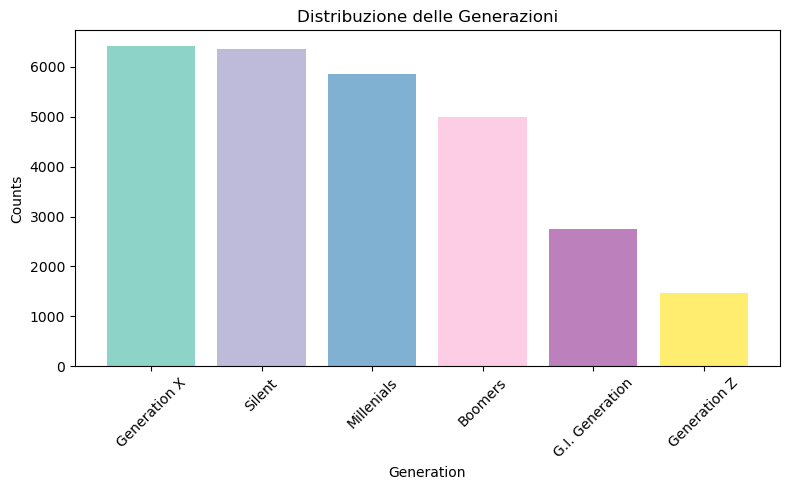

In [10]:
generations = (
    pd.crosstab(index=df['generation'], columns='counts')
      .sort_values('counts', ascending=False)
)

print(generations)
# Genera una lista di colori diversi (uno per barra)
colors = plt.cm.Set3(np.linspace(0, 1, len(generations)))

# Plot
plt.figure(figsize=(8,5))
plt.bar(generations.index, generations['counts'], color=colors)

plt.title("Distribuzione delle Generazioni")
plt.xlabel("Generation")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


col_0        counts
age                
15-24 years    4642
25-34 years    4642
35-54 years    4642
55-74 years    4642
75+ years      4642
5-14 years     4610


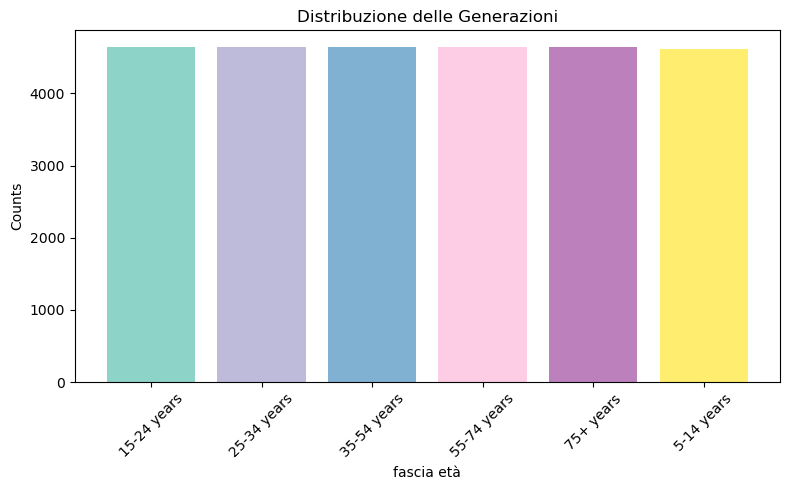

In [11]:
ages = (
    pd.crosstab(index=df['age'], columns='counts')
      .sort_values('counts', ascending=False)
)

print(ages)
# Genera una lista di colori diversi (uno per barra)
colors = plt.cm.Set3(np.linspace(0, 1, len(ages)))

# Plot
plt.figure(figsize=(8,5))
plt.bar(ages.index, ages['counts'], color=colors)

plt.title("Distribuzione delle Generazioni")
plt.xlabel("fascia età")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


col_0                   counts
country                       
Austria                    382
Mauritius                  382
Netherlands                382
Iceland                    382
Brazil                     372
...                        ...
Bosnia and Herzegovina      24
Dominica                    12
Cabo Verde                  12
Macau                       12
Mongolia                    10

[101 rows x 1 columns]


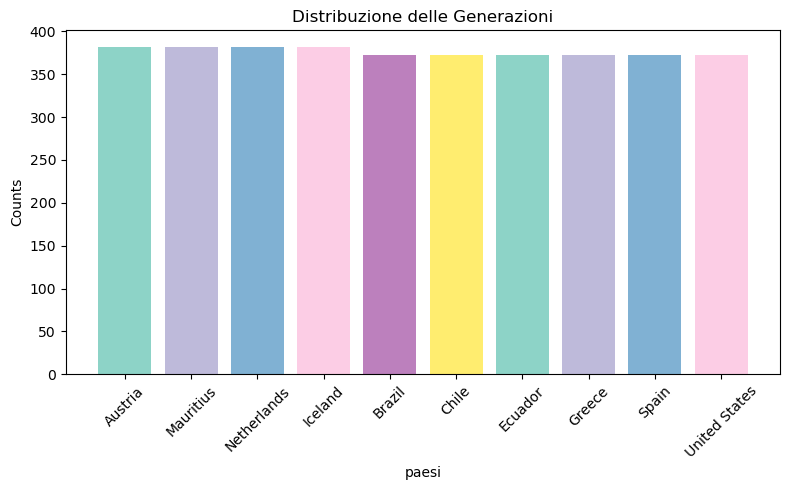

In [12]:
countries = (
    pd.crosstab(index=df['country'], columns='counts')
      .sort_values('counts', ascending=False)
)

print(countries)
top_10 = countries[:10]
# Genera una lista di colori diversi (uno per barra)
colors = plt.cm.Set3(np.linspace(0, 1, len(ages)))

# Plot
plt.figure(figsize=(8,5))
plt.bar(top_10.index, top_10['counts'], color=colors)

plt.title("Distribuzione delle Generazioni")
plt.xlabel("paesi")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
numeric = df.select_dtypes(include = ('int64', 'float64'))
numeric


year  suicides_no  population  suicides_100k_pop  hdi_for_year  \
0      1987           21      312900               6.71        0.6755   
1      1987           16      308000               5.19        0.6755   
2      1987           14      289700               4.83        0.6755   
3      1987            1       21800               4.59        0.6755   
4      1987            9      274300               3.28        0.6755   
...     ...          ...         ...                ...           ...   
27815  2014          107     3620833               2.96        0.6750   
27816  2014            9      348465               2.58        0.6750   
27817  2014           60     2762158               2.17        0.6750   
27818  2014           44     2631600               1.67        0.6750   
27819  2014           21     1438935               1.46        0.6750   

       gdp_for_year  gdp_per_capita  
0        2156624900             796  
1        2156624900             796  
2        2156624900             796  
3        2156624900             796  
4        2156624900             796  
...             ...             ...  
27815   63067077179            2309  
27816   63067077179            2309  
27817   63067077179            2309  
27818   63067077179            2309  
27819   63067077179            2309  

[27820 rows x 7 columns]

## pair plot

Generazione del grafico in corso...


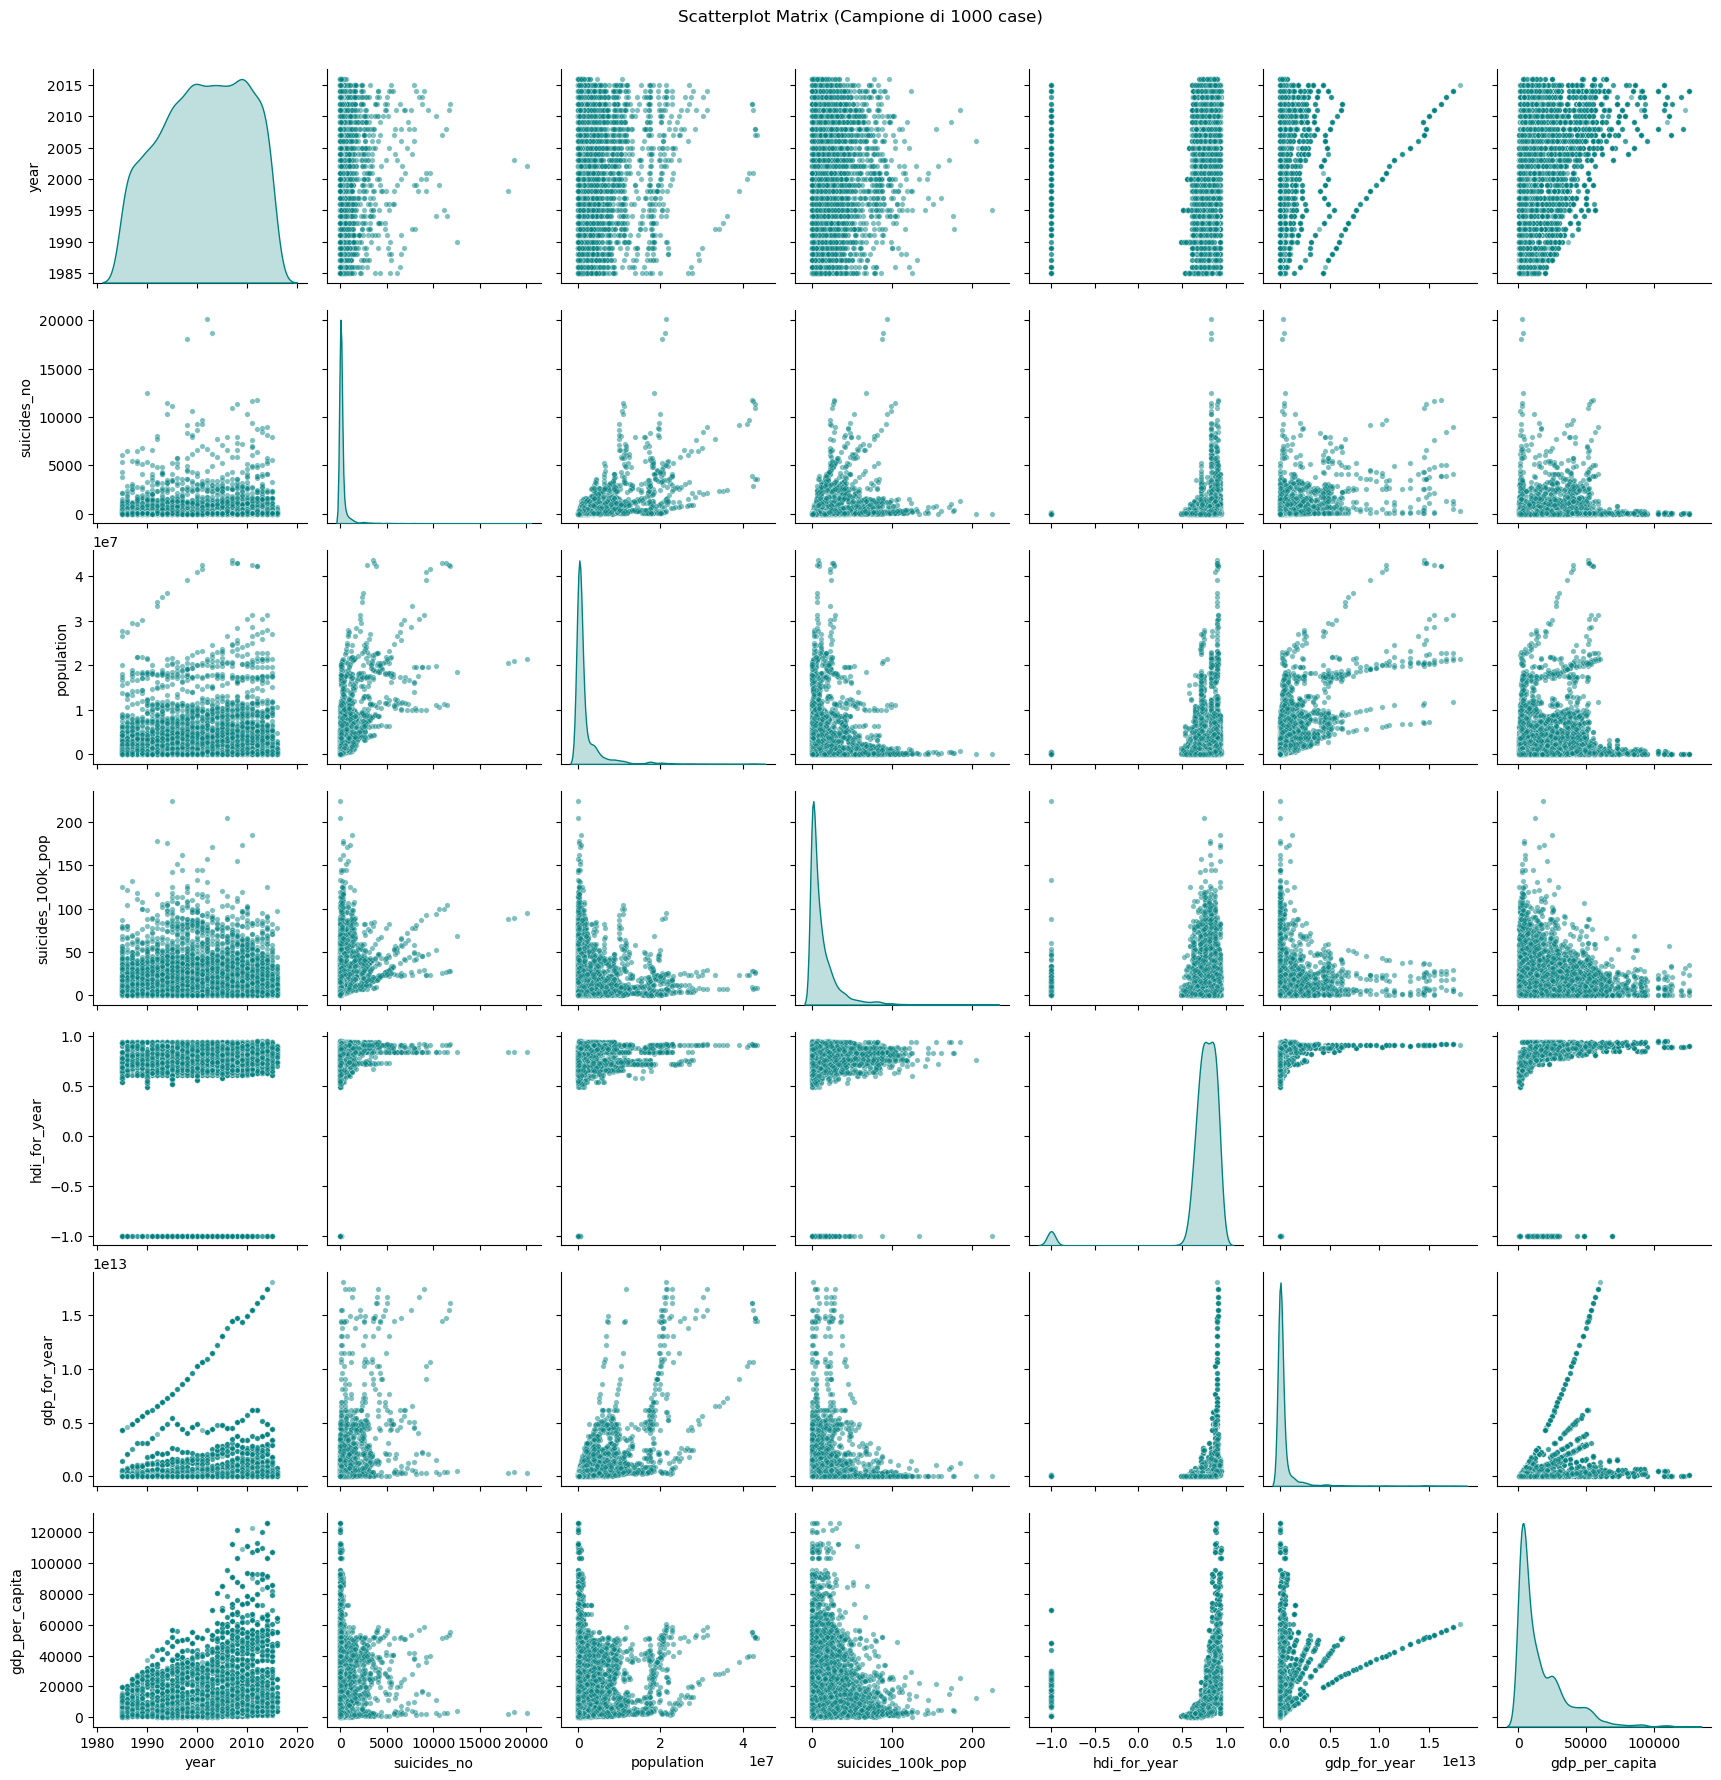

In [13]:
# 1. Selezione delle Feature più interessanti
# Escludiamo Lat/Lon (che vanno mappate, non scatterate) e variabili ridondanti
numeric = df.select_dtypes(include = ('int64', 'float64'))
cols_to_plot = numeric.columns

# 2. Campionamento dei dati
# Prendiamo un campione di 1000 righe casuali per evitare un "muro di inchiostro"
df_sample = df[cols_to_plot].sample(n=10000, random_state=42)

# 3. Creazione del Pairplot
# kind='scatter': usa i punti per le relazioni
# diag_kind='kde': usa le curve di densità sulla diagonale (invece degli istogrammi)
# plot_kws={'alpha': 0.5}: rende i punti semi-trasparenti per vedere le sovrapposizioni
print("Generazione del grafico in corso...")
g = sns.pairplot(df_sample, 
                 diag_kind='kde', 
                 plot_kws={'alpha': 0.5, 's': 15, 'color': 'teal'},
                 diag_kws={'color': 'teal', 'fill': True},
                 height=2.5)

g.fig.suptitle('Scatterplot Matrix (Campione di 1000 case)', y=1.02)
plt.show()

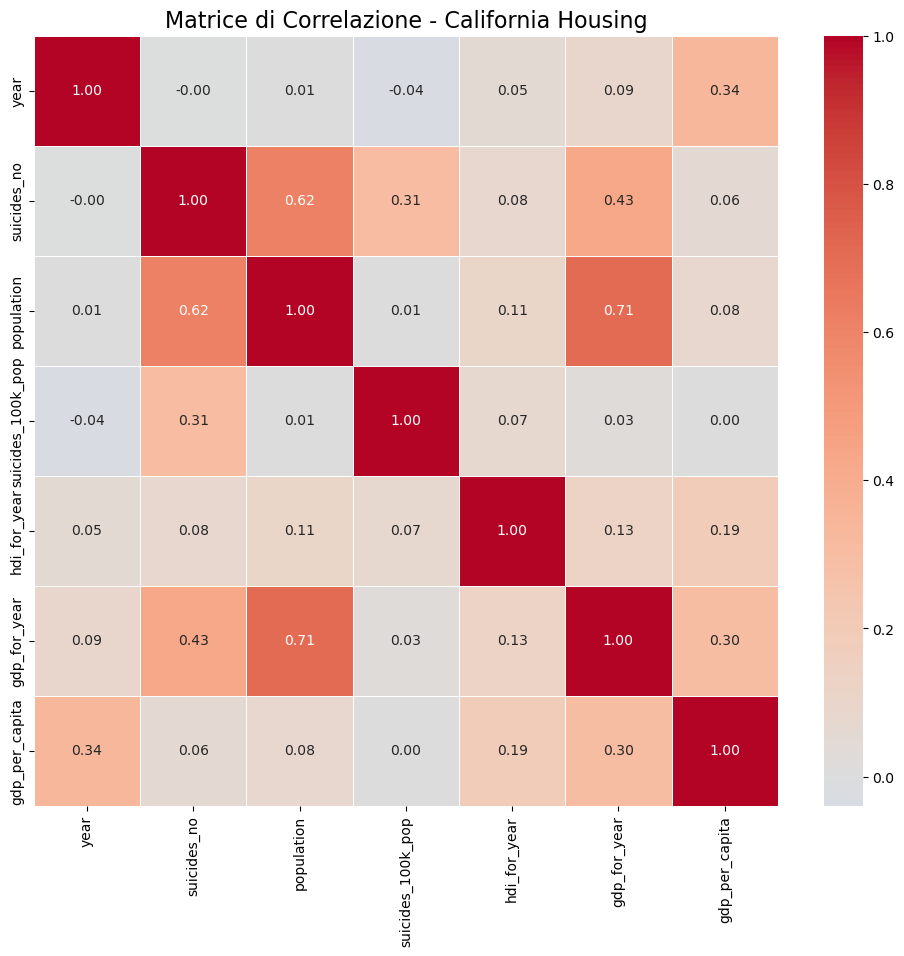

In [14]:
# 1. Calcolo la matrice di correlazione (coefficiente di Pearson)
# Nota: Se hai 'df_clean' dall'analisi precedente usa quello, altrimenti usa 'df'
corr_matrix = numeric.corr()

# 2. Setup della figura
plt.figure(figsize=(12, 10))

# 3. Creazione della Heatmap
# annot=True: scrive i numeri nelle celle
# cmap='coolwarm': Rosso=Positivo, Blu=Negativo, Bianco=Neutro
# fmt=".2f": arrotonda a 2 decimali per leggibilità
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            linewidths=0.5, 
            linecolor='white',
            fmt=".2f")

plt.title('Matrice di Correlazione - California Housing', fontsize=16)
plt.show()

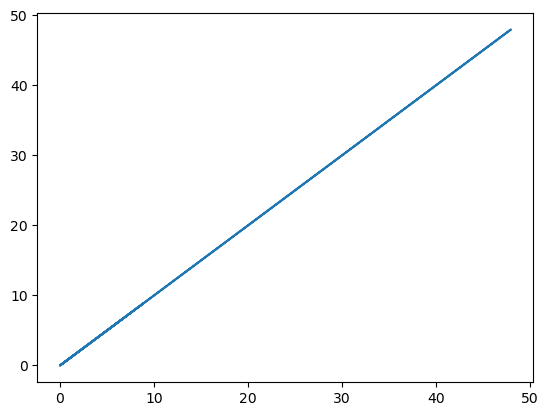

In [16]:
plt.plot(df['suicides_no']/df['population']*100000, df['suicides_100k_pop'])

# rimozione outliers

In [37]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_100k_pop', 'country-year', 'hdi_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [38]:
columns_to_clean = ['suicides_no', 'suicides_100k_pop','population','gdp_for_year']
df_outliers_removed = remove_outliers_iqr(df, columns_to_clean)

Generazione del grafico in corso...


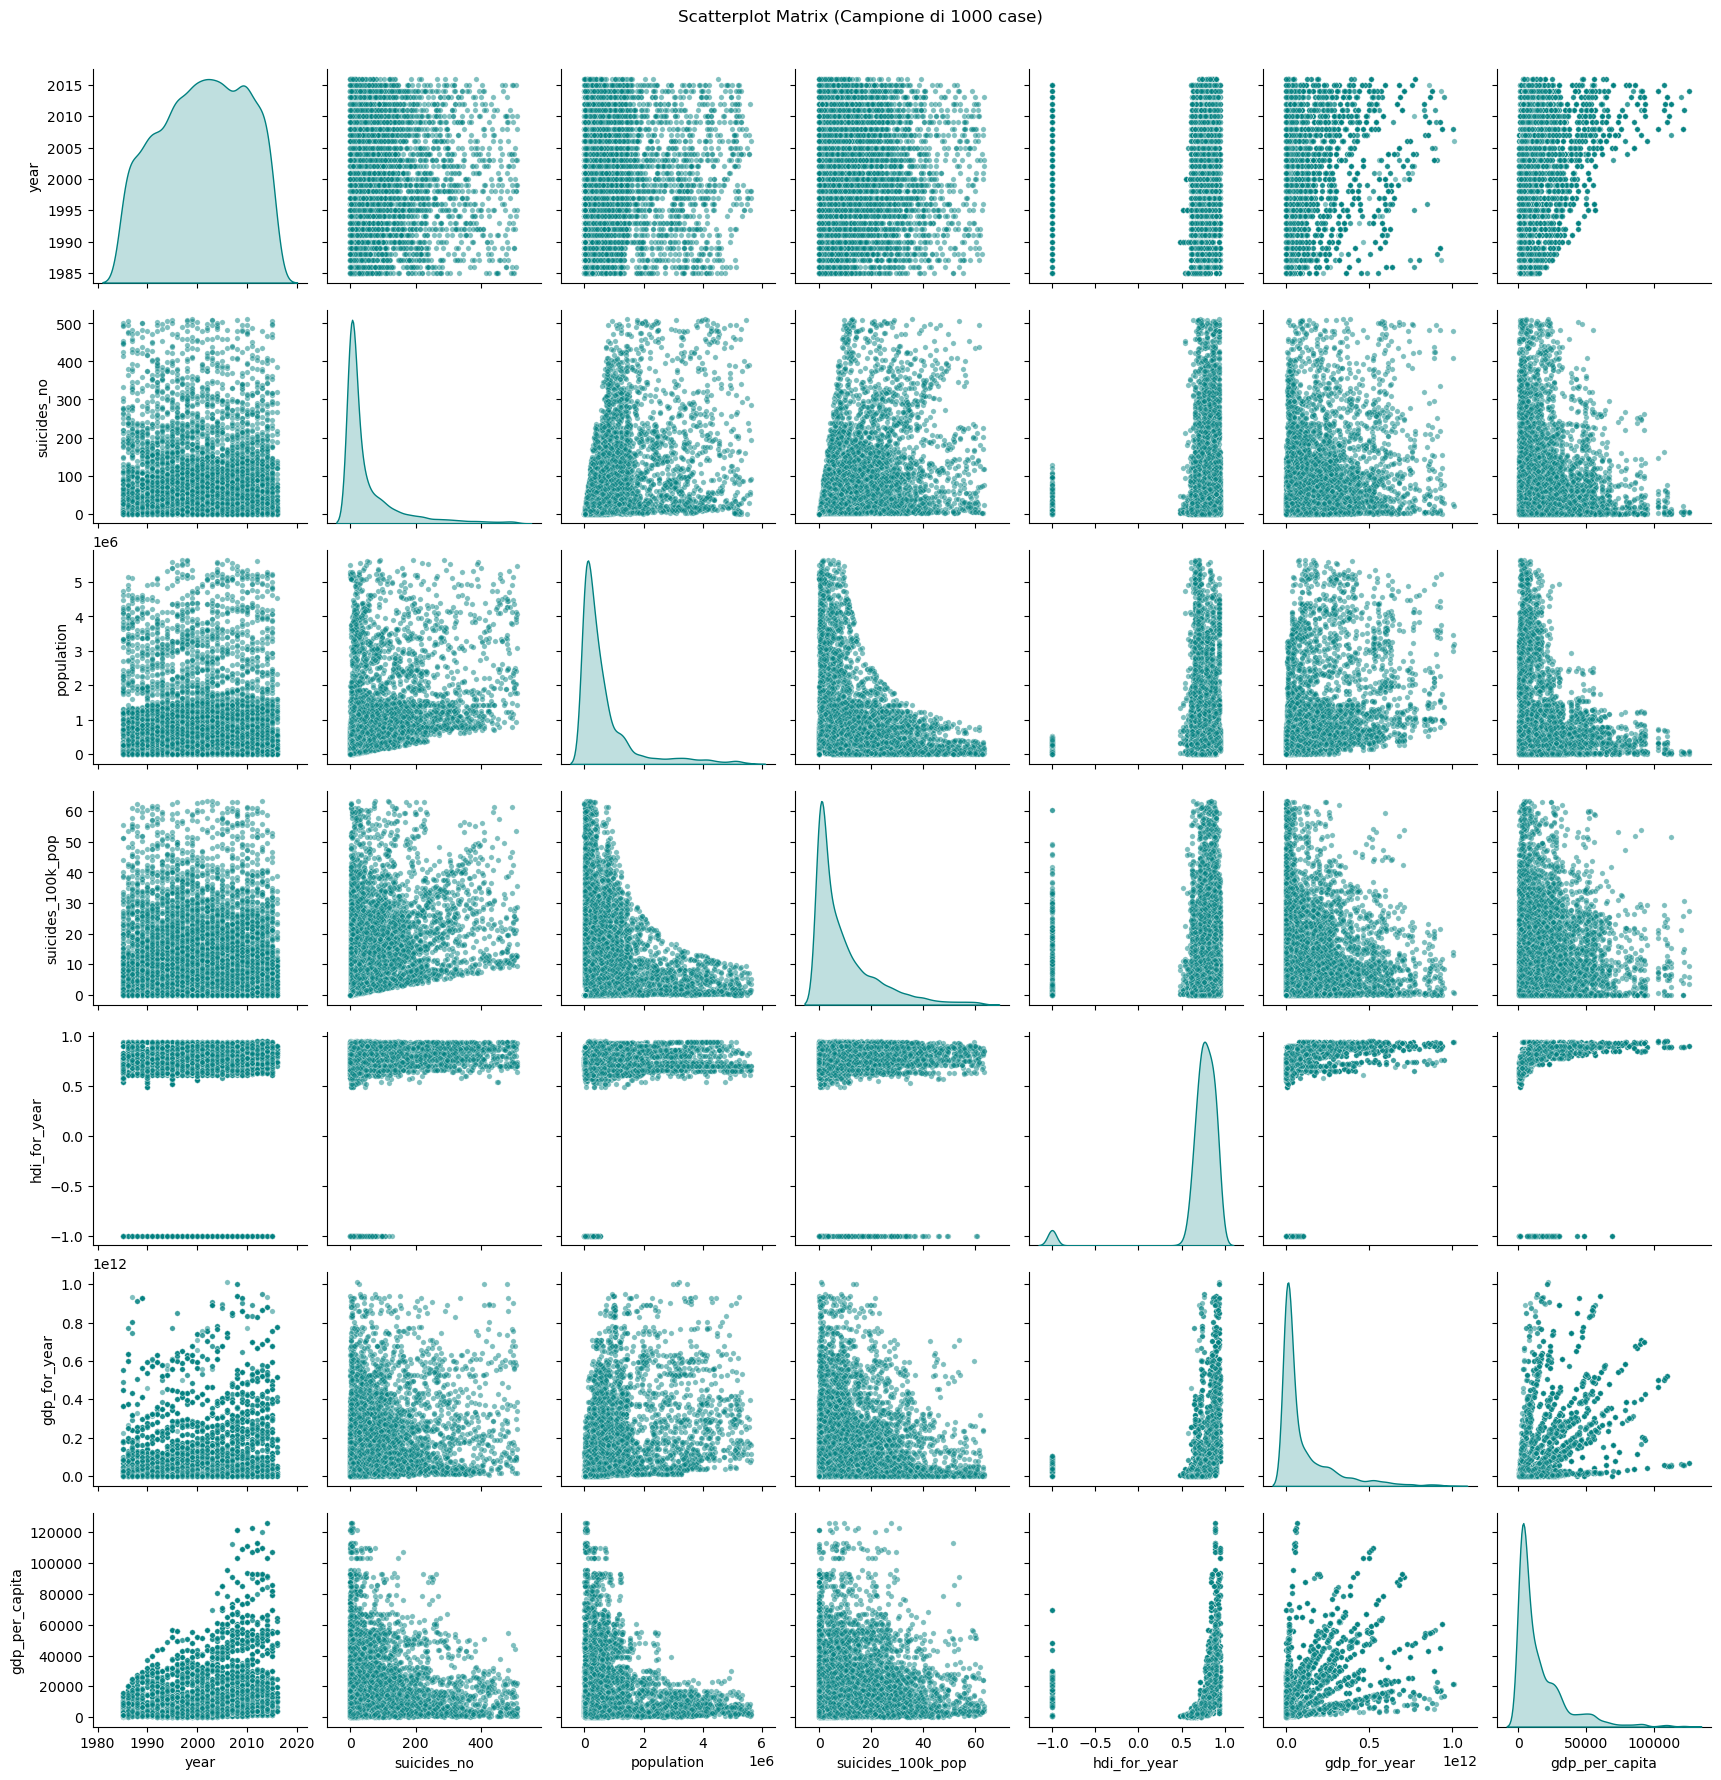

In [39]:
# 1. Selezione delle Feature più interessanti
# Escludiamo Lat/Lon (che vanno mappate, non scatterate) e variabili ridondanti
numeric = df_outliers_removed.select_dtypes(include = ('int64', 'float64'))
cols_to_plot = numeric.columns

# 2. Campionamento dei dati
# Prendiamo un campione di 1000 righe casuali per evitare un "muro di inchiostro"
df_sample = df_outliers_removed[cols_to_plot].sample(n=10000, random_state=42)

# 3. Creazione del Pairplot
# kind='scatter': usa i punti per le relazioni
# diag_kind='kde': usa le curve di densità sulla diagonale (invece degli istogrammi)
# plot_kws={'alpha': 0.5}: rende i punti semi-trasparenti per vedere le sovrapposizioni
print("Generazione del grafico in corso...")
g = sns.pairplot(df_sample, 
                 diag_kind='kde', 
                 plot_kws={'alpha': 0.5, 's': 15, 'color': 'teal'},
                 diag_kws={'color': 'teal', 'fill': True},
                 height=2.5)

g.fig.suptitle('Scatterplot Matrix (Campione di 1000 case)', y=1.02)
plt.show()

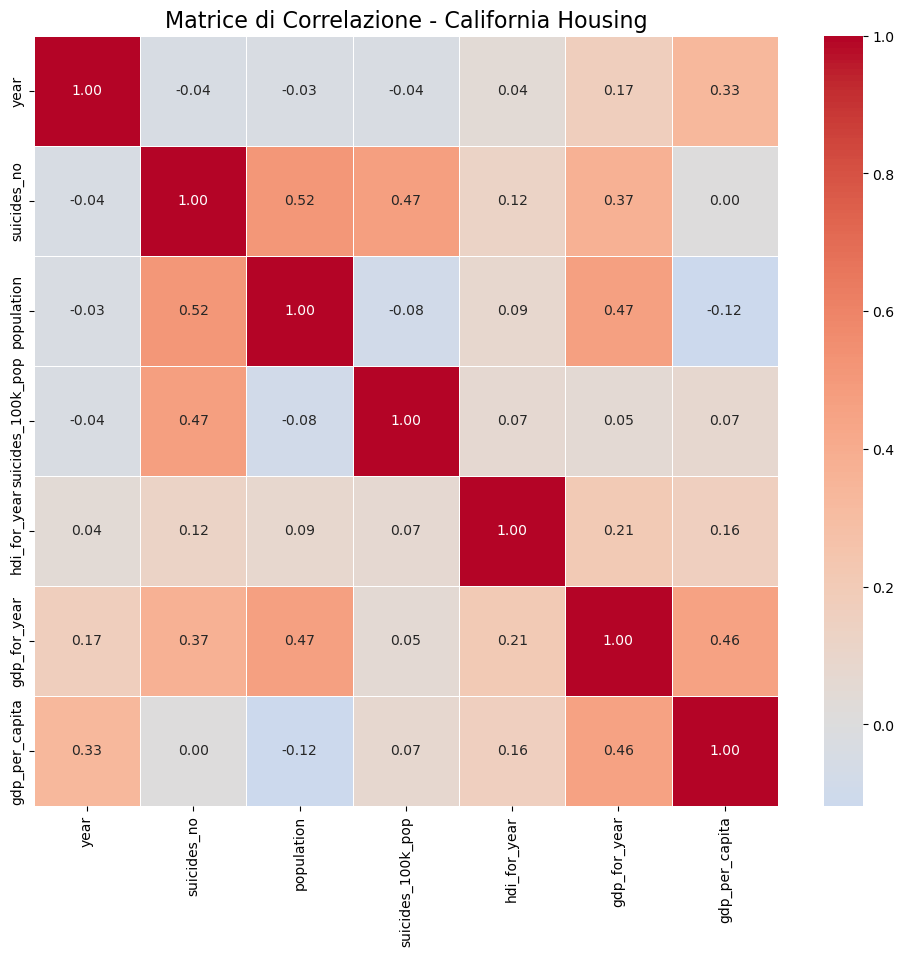

In [40]:
# 1. Calcolo la matrice di correlazione (coefficiente di Pearson)
# Nota: Se hai 'df_clean' dall'analisi precedente usa quello, altrimenti usa 'df'
corr_matrix = numeric.corr()

# 2. Setup della figura
plt.figure(figsize=(12, 10))

# 3. Creazione della Heatmap
# annot=True: scrive i numeri nelle celle
# cmap='coolwarm': Rosso=Positivo, Blu=Negativo, Bianco=Neutro
# fmt=".2f": arrotonda a 2 decimali per leggibilità
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            linewidths=0.5, 
            linecolor='white',
            fmt=".2f")

plt.title('Matrice di Correlazione - California Housing', fontsize=16)
plt.show()

C:\Users\m-rog\AppData\Local\Temp\ipykernel_29512\700708433.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


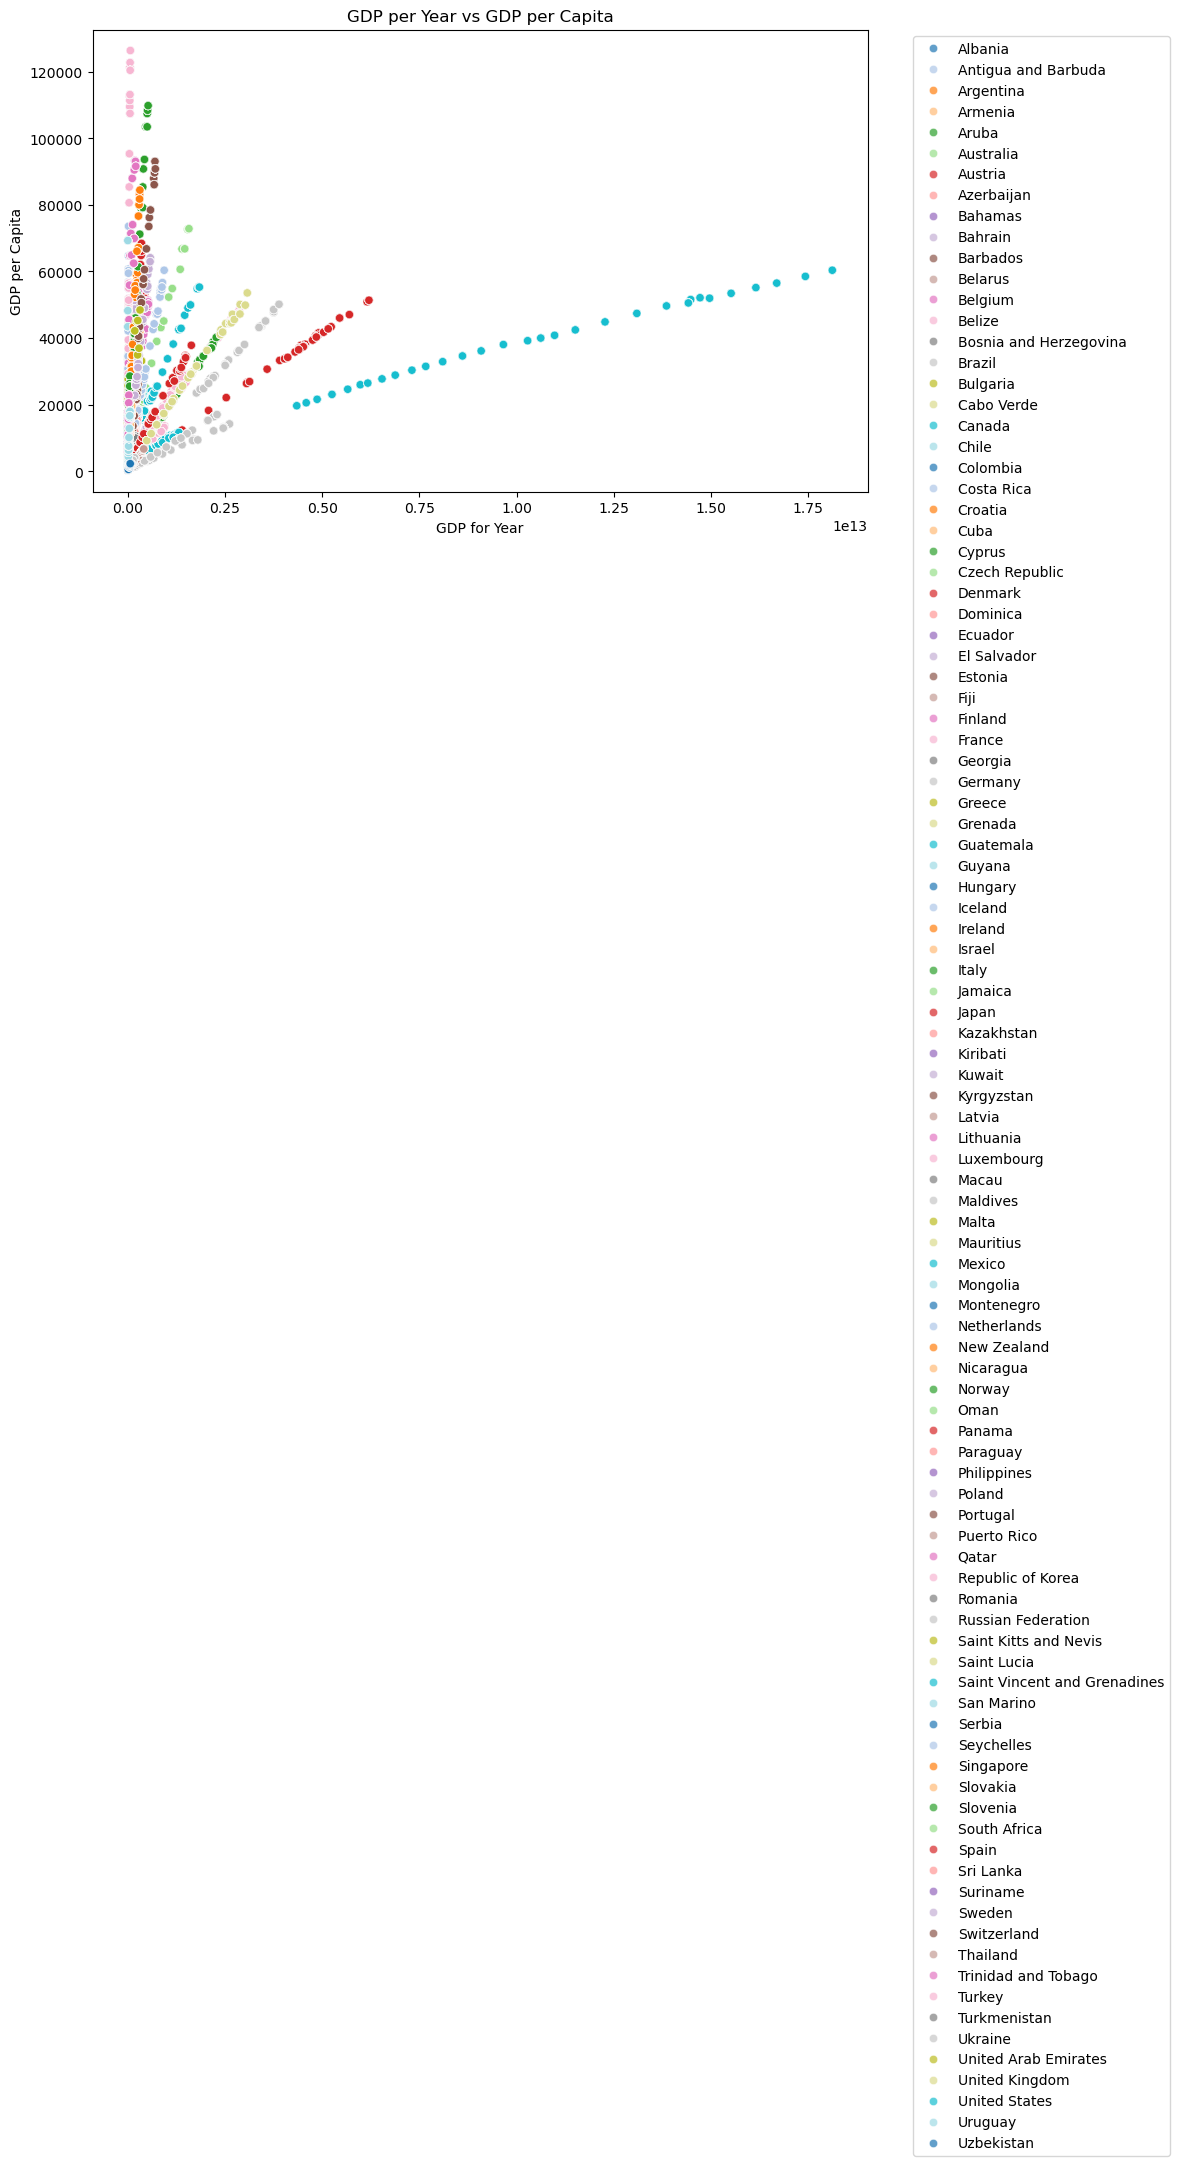

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df,
    x='gdp_for_year',
    y='gdp_per_capita',
    hue='country',       # colore per paese
    palette='tab20',     # palette con molti colori
    legend='full',
    alpha=0.7
)

plt.title('GDP per Year vs GDP per Capita')
plt.xlabel('GDP for Year')
plt.ylabel('GDP per Capita')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # legenda fuori dal plot
plt.tight_layout()
plt.show()